In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys 
import spacy
from sklearn.model_selection import train_test_split


#Self defined classes

from textpreprocesser import * 
from modelsk import * 
from keras_plotters import *
from modelkeras import *

%matplotlib inline 

In [101]:
"""
If not already downloaded, download nlt packages
"""

#nltk.download()

'\nIf not already downloaded, download nlt packages\n'

In [102]:
root_dir = ""


"""
from google.colab import drive
drive.mount('/content/gdrive')
root_dir = "/content/gdrive/My Drive/"""

'\nfrom google.colab import drive\ndrive.mount(\'/content/gdrive\')\nroot_dir = "/content/gdrive/My Drive/'

# 1. Data Loading & Exploratory analysis

In [103]:
df = pd.read_csv('archive/Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [104]:
print(len(df)) #Number of reviews

568454


In [105]:
df.isna().sum() # Show null values

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

There are no nulls in the Score and Text column

In [106]:
sum(df.duplicated())

0

There aren't any duplicates

In [107]:
review_score  = df[["Id","Score","Text"]]#Get only usefull columns
review_score = review_score.set_index("Id") #Set index as Id

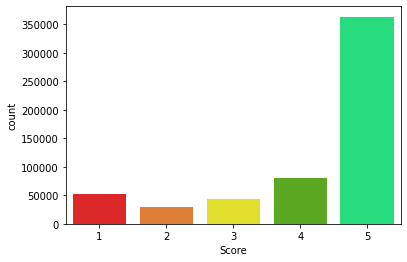

In [108]:
sns.countplot(review_score["Score"],palette= ['#FA0A0A',"#FA7B1E","#FFFB0F","#58BE0C","#0AFA7B"] ) 
plt.show()

There are many more 5s than other scores, so the data is right skewed.

In [109]:
review_score.describe()

,Score
count,568454.000000
mean,4.183199
std,1.310436
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Median score is 5, which was expected from the above plot.

# 2. Text analysis & preprocessing

In this section the Review texts are preprocessed with the following steps


1.   Make all lowercase
2.   Remove html
3.   Remove punctioation
4.   Remove stopwords
5.   Lemmatization (Instead of stemming this method is chosen)

In [110]:
import random
random.sample(list(review_score["Text"].values),5)

['I took these into the office and they were a hit. Good assortment of flavors, tasty, and vitamin fortified is a nice benefit. Would be five stars, but a little pricey, especially with shipping.',
 "I have been looking for red popcorn for some time and when I found this I was pretty excited and ordered it even though I had to order so much. I used to buy red popcorn when I lived in the midwest but have never seen it in the northwest. I have only popped it once and there were a lot of unpopped kernels.  My cheap yellow popcorn from the grocery store is much better than this.  I am very disappointed and don't recommend buying it.",
 "I love this sauce... Very hot and very tasty. Starts out with a kinda fruity smoky flavor followed by a Very impressive heat. I use this sauce daily. chilly, tacos, eggs. It's good on everything but be prepared this is not your every day hot sauce read the warning label on the bottle. One website put this sauce at over 600k scovils so if your new to the REA

**Observation:** 
1. Uppercase - lowercase 
2. Punctioations
3. Some html (e.g. "<br '/'><br '/'>" )
4. Some special characers like $, % 

In [111]:
review_score.Text.head()

Id
1    I have bought several of the Vitality canned d...
2    Product arrived labeled as Jumbo Salted Peanut...
3    This is a confection that has been around a fe...
4    If you are looking for the secret ingredient i...
5    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

In [120]:
#Create TextPreprocesser object
txtpr = TextPreprocesser([TextPreprocesser.to_lower,
                          TextPreprocesser.remove_html,
                          TextPreprocesser.remove_punctuation,
                          TextPreprocesser.remove_stopwords,
                          TextPreprocesser.lemmatize_text])


In [121]:
column = "Text"

In [122]:

txtpr.preprocess(review_score,column)

Here a new dataframe created and saved since lemmatization process is an expensive operation in time complexity


In [123]:
review_score.to_csv("preprocessed_data.csv")

## 2.2 Load Preprocessed Data Directly

In [124]:
column = "Text"
review_score = pd.read_csv(root_dir+"preprocessed_data.csv")

In [125]:
review_score[column].head()

0    bought several vitality canned dog food produc...
1    product arrived labeled jumbo salted peanut   ...
2    confection around century   light  pillowy cit...
3    looking secret ingredient robitussin believe f...
4    great taffy great price   wide assortment yumm...
Name: Text, dtype: object

# 3. Word Frequencies

Under this section further analysis conducted, and preprocessing done to increase *performance*

In [ ]:
#Create a dictionary of words with word count
dictionary = {}
for sent in list(review_score[column].values):
    tokens = sent.split(' ')
    for token in tokens:
        if token != "":
            if (token) in dictionary:
                dictionary[token] += 1
            else:
                dictionary[token] = 1

In [ ]:
import operator
#Sort the dictionary by word counts
sorted_dict = sorted(dictionary.items(), key=operator.itemgetter(1),reverse=True)

## 3.1 Most frequently used words

In [ ]:
words = []
count = []
for i in range(0,75):
    words.append(sorted_dict[i][0])
    count.append(sorted_dict[i][1])

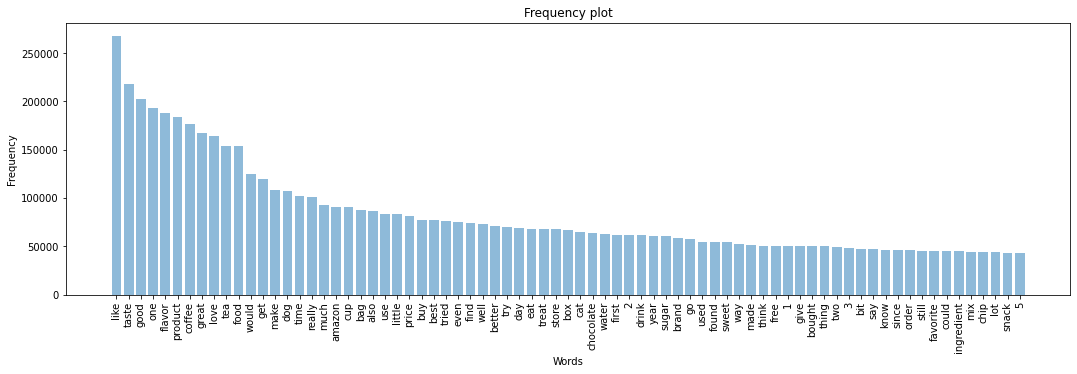

In [ ]:
y_pos = np.arange(len(words))

f, ax = plt.subplots(figsize=(18,5))

plt.bar(y_pos, count, alpha=0.5)
plt.xticks(y_pos, words,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Words')
plt.title('Frequency plot')

plt.show()

Only get top  words > n frequency

In [ ]:
len(sorted_dict)

104345

104345 unique words

## 3.2 Filter data

Under this section data is filtered to improve performance.(Feature dimension reduction)



1.   There are only 5125 unique words which are used more than 300 times, we can only use them.
2.   99.5% of the reviews are shorter than 349 words, and the maximum length is greater than 3000, which increases the dimesion. So we use reviews with word counts less than 350.



In [ ]:
texts = review_score["Text"].values
scores = review_score.Score.values

In [ ]:
sorted_dictionary = {k: v for k, v in sorted(dictionary.items(), key=lambda item: item[1],reverse=True)}

In [ ]:
sorted_words = list(sorted_dictionary.keys())

In [ ]:
np.percentile(list(sorted_dictionary.values()),75)

10.0

In [ ]:
dictionary_frequent = {k: v for k, v in dictionary.items() if v > 50}

In [ ]:
len(dictionary_frequent)

12385

In [ ]:
review_score["tokenlen"] = review_score["Text"].apply(lambda x:len(x.split(" ")))

In [ ]:
np.percentile(review_score["tokenlen"].values,99.50)

349.0

Since 99.5% of reviews are less than 349 tokens I can remove >349

In [ ]:
review_score = review_score[review_score["tokenlen"]<349]

# 4. SKlearn Models

Under this section machine learning models are trained and tested by using scikit-learn.

Stratified sampling is used to train test split, and for corss valdiation since the data is skewed. We could also performed undersampling or upscaling however it has ben left out due to time restrictions for now.

To compare models, confusion matrix are used. Accuracy is not a good metric for this data since it is imbalanced. Also ROC-AUC and F1 scores are calculated



1.   Naive Bayes : To have a baseline mode. 

2.   Support Vector Machine : It performed very bad 

3.   Logistic Regression(Multi-class, one vs all): It performed way better than then NB.

Note: With proper hyperparametertuning these models could have performed better, but it requires more time.


Futurework: Hyperparameter tuning, re-sampling the data(upscale or downscale) and also training multiple models to ensemble can be a good soultion (one model to predict 5 or not, other to predict 1-4 )


In [99]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

class ModelSK:
    def __init__(self, model,X,y):
        """
        model: sklearn model
        X: Text column
        y: Score column
        """
        self.model = model
        self.X = X
        self.y = y
        self.pipe = None
        self.cv_pred = None
        self.best_model = None

    def get_train_test(self,X,y,splittype="stratified",test_size = 0.33):
      """
      This function returns splitted train test pairs for X and y. 
      params
        X: Text column
        y: Score column
        splittype(string): The type of train test split, it can be stratified or methods like 
                    upsampling/downsampling to deal with imbalanced data
      outs:
       X_train, X_test, y_train, y_test
      """
      if splittype == "stratified":
        #Stratified train/test split since data is skewed
        X_train, X_test, y_train, y_test = train_test_split(
                          self.X, self.y, test_size= test_size, random_state=42,stratify=self.y)
        return  X_train, X_test, y_train, y_test
      else:
        print("Unknown split type")
        return None

    def build_pipeline(self,ngram_range = (1,2)):
      """
      Buids a pipeline
      1. CountVectorizer: Converts texts to a matrix of token counts (if you want to include 2 ngram set to (1,2) )
      2. TfidfTransformer: Transform the count matrix to a normalized tf-idf representation
      3. Model: Selected model to predict score
      """
      pipe = Pipeline([('CVec', CountVectorizer()),
                     ('Tfidf', TfidfTransformer()),
                     ('model', self.model)])
      
      self.pipe = pipe

    def cross_val_train(self,scoring,n_splits=5):
      """
      Trains the model by using cross validation
      params:
        scoring(string): scoring method to evaluate the model
        n_splits(int): number of splits for the cross validation
      """
      skf = StratifiedKFold(n_splits=n_splits) #Stratified split
      cv_pred = cross_validate(self.pipe,self.X, self.y, cv=skf,scoring=(scoring), n_jobs=-1, verbose =10)
      self.cv_pred=cv_pred



    
    def plot_confusion_matrix(self,n_splits=5,normalize=True):
      """
      Plots a confusion matrix from the model
      params:
        n_splits(int)= number of splits for the cross validation
        normalize(boolean) = If true prints a normalized matrix
      """
      skf = StratifiedKFold(n_splits=n_splits)
      y_pred = cross_val_predict(self.pipe, self.X, self.y, cv=skf)
      conf_mat = confusion_matrix(self.y, y_pred)
      if normalize:
        conf_mat = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
      sns.heatmap(conf_mat, annot=True)


      def parameter_tuning(self):
        param_grid = [
                      {'model' : [self.model],
                      'classifier__penalty' : ['l1', 'l2'],
                      'classifier__C' : np.logspace(-4, 4, 20),
                      'classifier__solver' : ['liblinear']},
                      ]
      clf = GridSearchCV(self.pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

      

In [126]:
X = review_score["Text"]
y = review_score["Score"]


### NB

In [ ]:
mymodel = ModelSK(MultinomialNB(),X,y)
mymodel.build_pipeline()
mymodel.cross_val_train(scoring="f1_weighted")


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  1.1min remaining:   44.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.4min finished


In [ ]:
print(mymodel.cv_pred['test_score'])

[0.53160848 0.53387729 0.53347047 0.53371085 0.5313441 ]


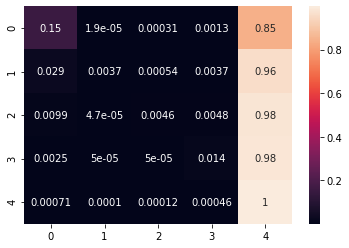

In [ ]:
mymodel.plot_confusion_matrix()

### SVM

In [ ]:
mymodel = ModelSK(linear_model.SGDClassifier(loss='hinge',penalty='l2',alpha=1e-3, max_iter=10, random_state=42),X,y)
mymodel.build_pipeline()
mymodel.cross_val_train(scoring="f1_weighted")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  1.3min remaining:   52.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.7min finished


In [ ]:
print(mymodel.cv_pred['test_score'])

[0.49983947 0.49970791 0.49975032 0.50013311 0.49990444]


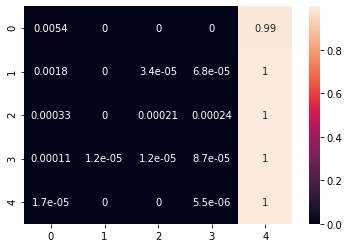

In [ ]:
mymodel.plot_confusion_matrix()

### Logistic Regression (Multiclass)

In [ ]:
mymodel = ModelSK( LogisticRegression(C=1e5),X,y)
mymodel.build_pipeline()
mymodel.cross_val_train(scoring="f1_weighted")


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  3.8min remaining:  2.5min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.9min finished


[0.70195287 0.71292984 0.70586688 0.71029718 0.70621035]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


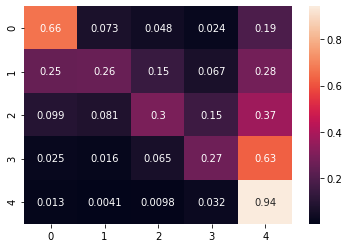

In [ ]:
print(mymodel.cv_pred['test_score'])
mymodel.plot_confusion_matrix()

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'model' : [LogisticRegression()],
                      'model__penalty' : ['l1', 'l2'],
                      'model__C' : np.logspace(-4, 4, 20),
                      'model__solver' : ['liblinear']},
                      ]
clf = GridSearchCV(mymodel.pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)
X_train,X_test,y_train,y_test = mymodel.get_train_test(X,y)
best_clf = clf.fit(X_train, y_train)

Logistic Regression outperformed other two models.

# 5. Model Keras (LSTM)

Under this section a RNN model is trained by using keras. This model outperformed above models(confusion matrix). However, due to time restrictions hyper-parameter tuning was not performed. 



In [ ]:
maxlen = 0
maxtokens = []
for text in review_score["Text"].values:
    tokens = text.split(' ')
    if len(tokens) > maxlen:
        maxlen  = len(tokens)
print("Maximum length: ", maxlen)


Maximum length:  348


In [ ]:
mymodel = ModelKeras(X,y,maxlen)
mymodel.prepare_train_test()
mymodel.construct_model()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 348, 64)           792640    
_________________________________________________________________
dropout_4 (Dropout)          (None, 348, 64)           0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 256)               197632    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 1542      
Total params: 991,814
Trainable params: 991,814
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
hist = mymodel.fit(epochs=10, batch_size=2048).history 

Epoch 1/10
221/221 [==============================] - 124s 562ms/step - loss: 0.9286 - tp: 261890.0000 - fp: 76139.0000 - tn: 2186251.0000 - fn: 190588.0000 - accuracy: 0.9018 - precision: 0.7748 - recall: 0.5788 - auc: 0.9106 - val_loss: 0.7749 - val_tp: 72406.0000 - val_fp: 17642.0000 - val_tn: 547958.0000 - val_fn: 40714.0000 - val_accuracy: 0.9140 - val_precision: 0.8041 - val_recall: 0.6401 - val_auc: 0.9386
Epoch 2/10
221/221 [==============================] - 124s 559ms/step - loss: 0.7560 - tp: 285306.0000 - fp: 62581.0000 - tn: 2199809.0000 - fn: 167172.0000 - accuracy: 0.9154 - precision: 0.8201 - recall: 0.6305 - auc: 0.9415 - val_loss: 0.7290 - val_tp: 72588.0000 - val_fp: 15381.0000 - val_tn: 550219.0000 - val_fn: 40532.0000 - val_accuracy: 0.9176 - val_precision: 0.8252 - val_recall: 0.6417 - val_auc: 0.9456
Epoch 3/10
221/221 [==============================] - 123s 558ms/step - loss: 0.7223 - tp: 292604.0000 - fp: 62803.0000 - tn: 2199587.0000 - fn: 159874.0000 - accurac

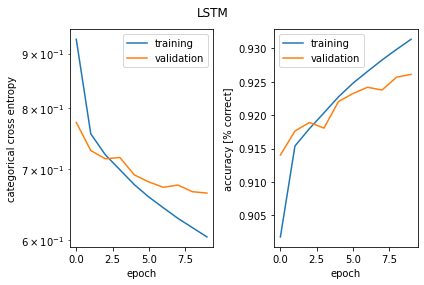

In [ ]:
plots = plot_history(hist,"LSTM")

array([[0.73856398, 0.0805829 , 0.05597375, 0.01881876, 0.10606061],
       [0.26004728, 0.31881121, 0.19976359, 0.0482945 , 0.17308342],
       [0.0994931 , 0.0816928 , 0.44382883, 0.13603678, 0.23894849],
       [0.02456819, 0.01502775, 0.08131197, 0.36010476, 0.51898734],
       [0.01422922, 0.00531003, 0.01465789, 0.0380552 , 0.92774766]])

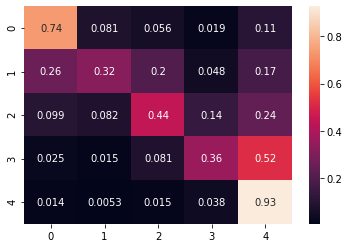

In [ ]:
y_predict =  mymodel.predict()
mymodel.get_plot_confusion_matrix(y_predict)

In [ ]:
# Final evaluation of the model
#scores = model.evaluate(X_test, y_test, verbose=0)
#print("Accuracy: %.2f%%" % (scores[1]*100))

# Helpfulness

In [13]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [66]:
helpfullness = review_score.join(df[["UserId","ProfileName","HelpfulnessNumerator","HelpfulnessDenominator"]])

In [67]:
helpfullness.head(5)

,Id,Score,Text,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator
0,1,5,bought several vitality canned dog food produc...,A3SGXH7AUHU8GW,delmartian,1,1
1,2,1,product arrived labeled jumbo salted peanut ...,A1D87F6ZCVE5NK,dll pa,0,0
2,3,4,confection around century light pillowy cit...,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1
3,4,2,looking secret ingredient robitussin believe f...,A395BORC6FGVXV,Karl,3,3
4,5,5,great taffy great price wide assortment yumm...,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0


In [68]:
helpfullness = helpfullness[helpfullness["HelpfulnessDenominator"]!= 0]

In [69]:
helpfullness["HelpfulnessScore"] =helpfullness["HelpfulnessNumerator"]/helpfullness["HelpfulnessDenominator"]

In [70]:
helpfullness.HelpfulnessScore.describe()

count    298402.000000
mean          0.776975
std           0.346321
min           0.000000
25%           0.600000
50%           1.000000
75%           1.000000
max           3.000000
Name: HelpfulnessScore, dtype: float64

In [71]:
helpfullness["isHelpfull"] = helpfullness["HelpfulnessScore"] > 0.5

In [72]:
helpfullness.head(5)

,Id,Score,Text,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,HelpfulnessScore,isHelpfull
0,1,5,bought several vitality canned dog food produc...,A3SGXH7AUHU8GW,delmartian,1,1,1.0,True
2,3,4,confection around century light pillowy cit...,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1.0,True
3,4,2,looking secret ingredient robitussin believe f...,A395BORC6FGVXV,Karl,3,3,1.0,True
8,9,5,right mostly sprouting cat eat grass love ro...,A1MZYO9TZK0BBI,R. James,1,1,1.0,True
10,11,5,know cactus tequila unique combination ingredi...,A3HDKO7OW0QNK4,Canadian Fan,1,1,1.0,True


In [73]:
helpfulls = helpfullness[helpfullness["isHelpfull"]==True]

In [74]:
len(helpfulls)/len(df)

0.3987411470409215

## Word Cloud of Helpfull Reviews

In [50]:
from wordcloud import WordCloud

In [52]:
text = helpfulls.Text.values

In [53]:
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black').generate(str(text))

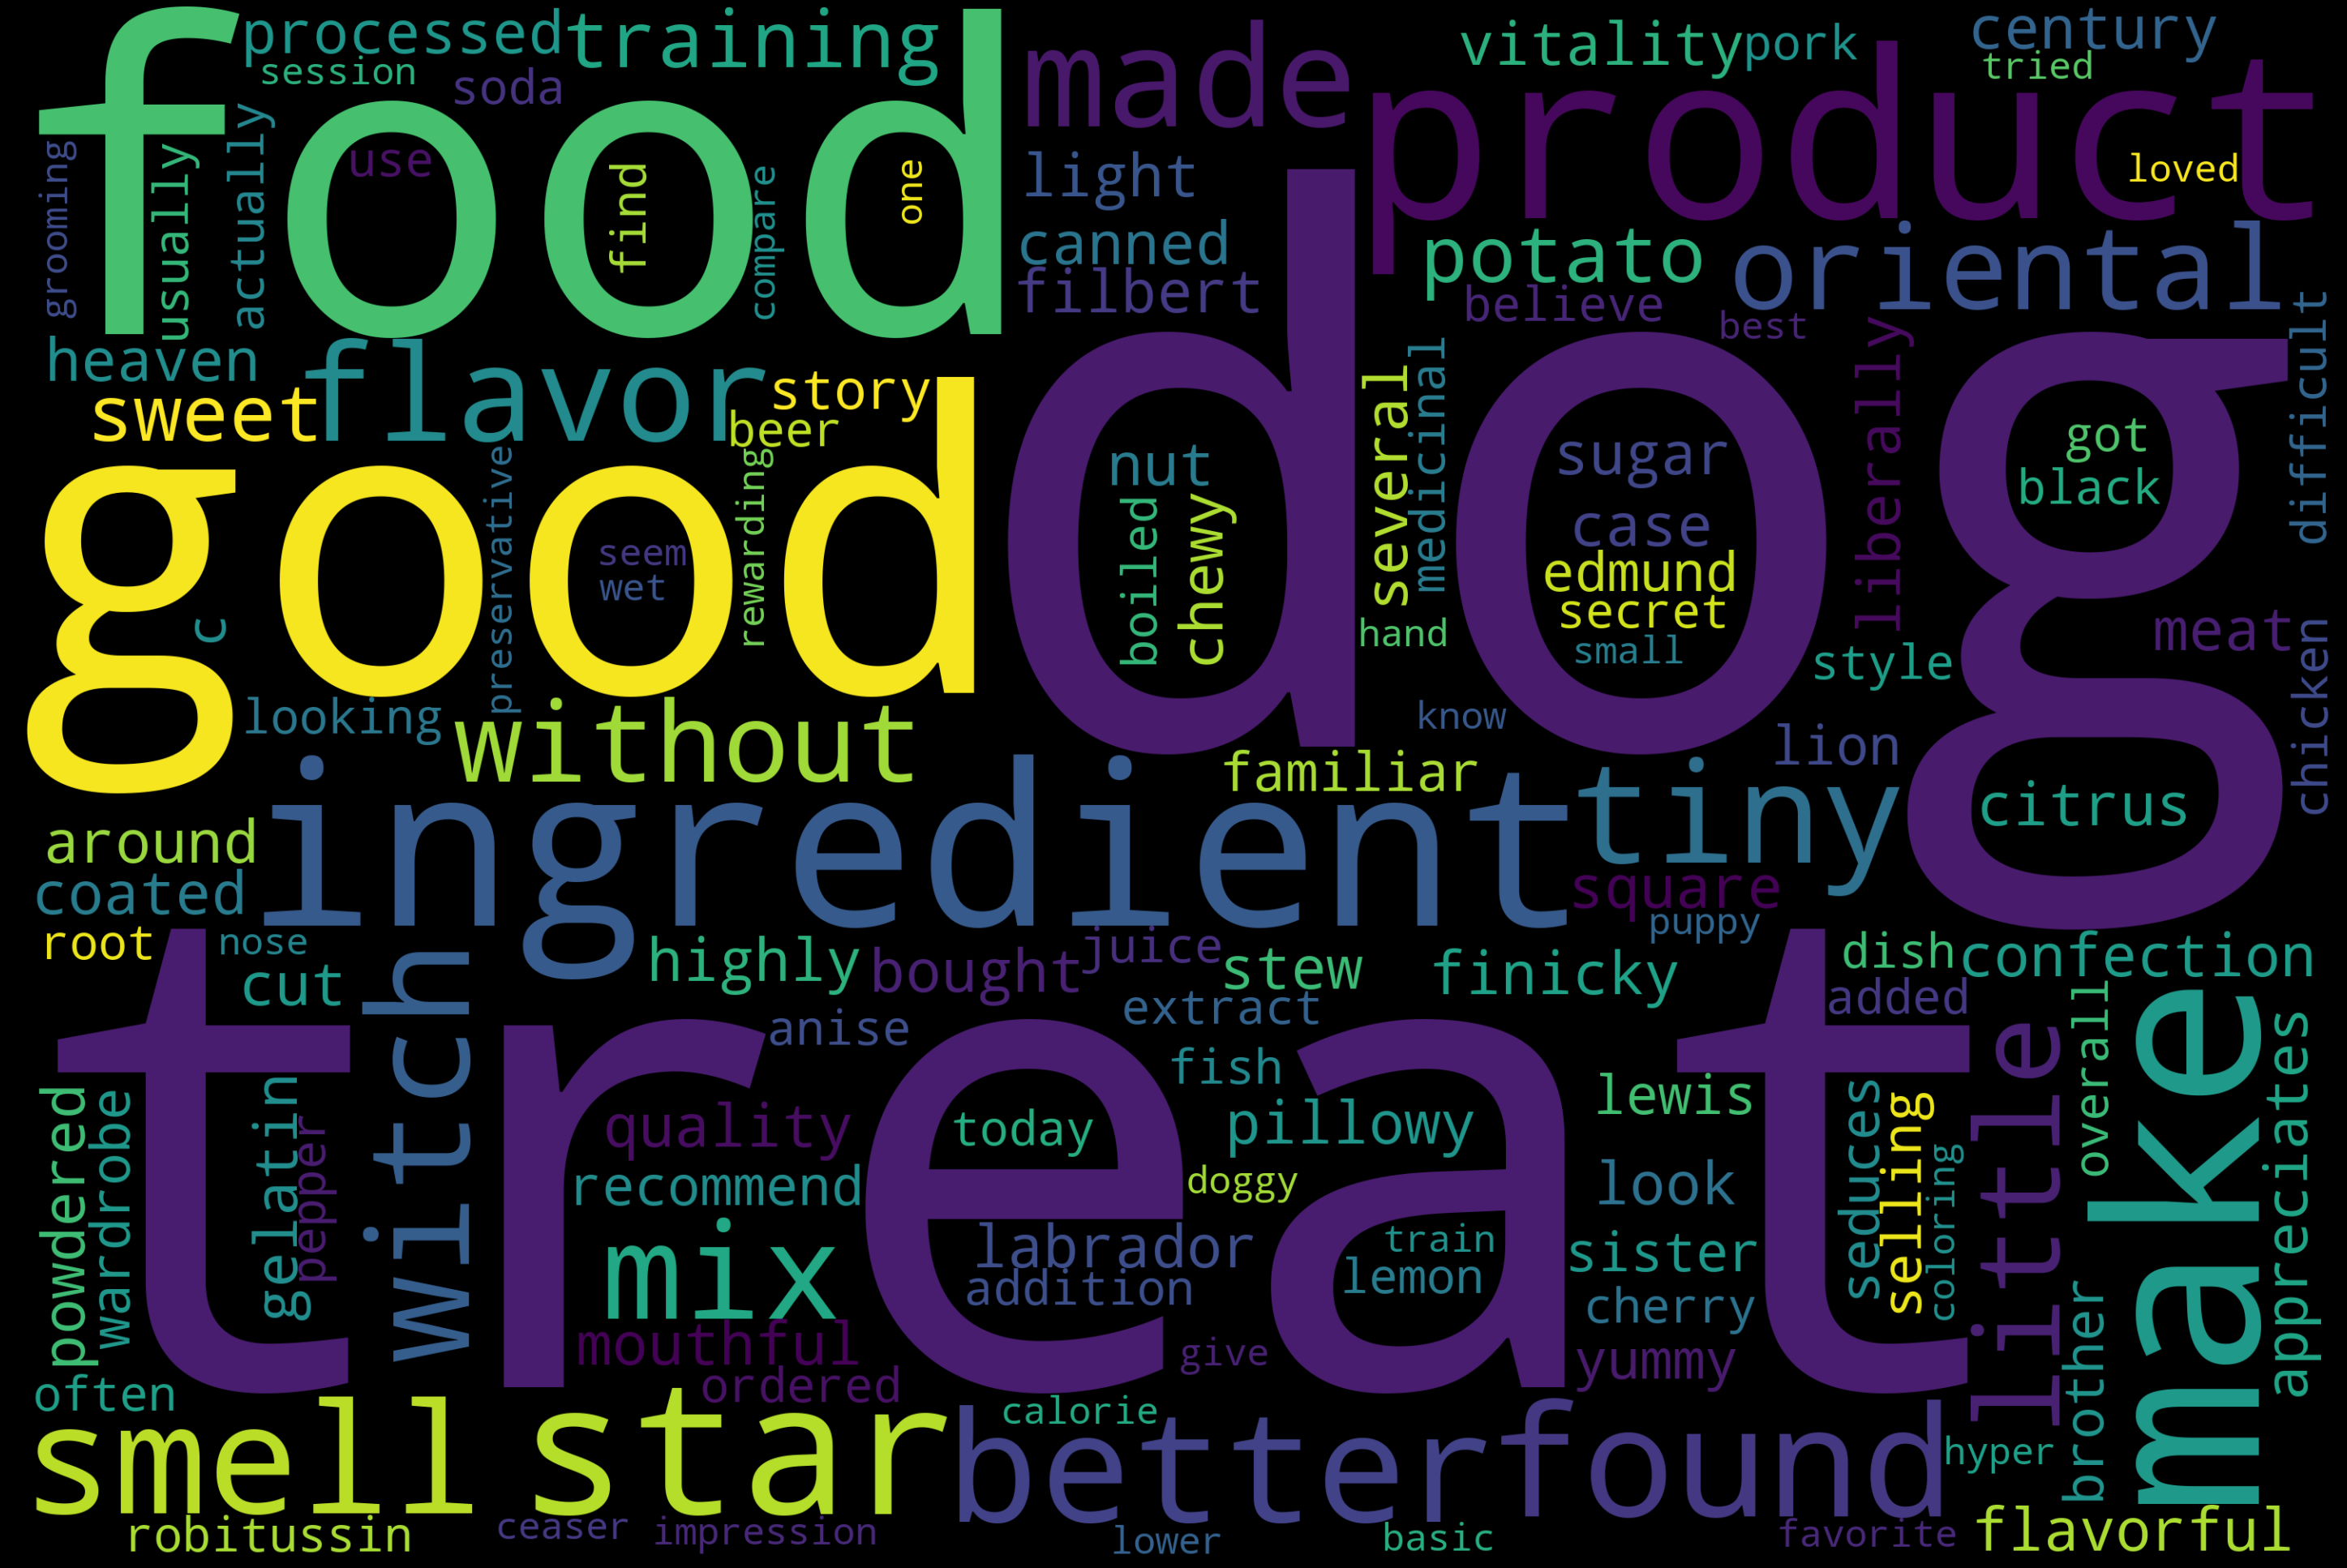

In [54]:
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Helpfullness vs Review Frequency of a user

In [91]:
helpfullness["HelpfulnessScore"] = helpfullness["HelpfulnessScore"]*100

In [92]:
freq_reviewer = helpfullness.groupby("UserId").agg({"HelpfulnessScore": ["mean","count"]})

In [93]:
freq_reviewer.head(5).reset_index()

UserId HelpfulnessScore      
                                  mean count
0  #oc-R103C0QSV1DF5E        50.000000     1
1  #oc-R109MU5OBBZ59U         0.000000     1
2  #oc-R10LFEMQEW6QGZ         0.000000     1
3  #oc-R115TNMSPFT9I7        66.666667     2
4  #oc-R119LM8D59ZW8Y        45.454545     1

In [94]:
freq_reviewer.columns

MultiIndex([('HelpfulnessScore',  'mean'),
            ('HelpfulnessScore', 'count')],
           )

In [95]:
freq_reviewer['HelpfulnessScore']['count'].corr(freq_reviewer['HelpfulnessScore']["mean"])

-0.01737995247416193

Couldn't find strong correlation between average helpfulness score and number of reviews of a user, however it is interesting that it is negative. Further analysis needed.